In [70]:
import pandas as pd
import numpy as np

In [71]:
df1= pd.read_excel('가구렌덤포레스트이후.xlsx', sheet_name = 0)

In [72]:
df1.head()

Unnamed: 0  q1  q10_1  q10_10  q10_11  q10_12  q10_2  q10_3  q10_4  q10_5  \
0           0   2      4       4       4       4      4      4      4      4   
1           1   1      4       4       4       4      4      4      9      4   
2           2   2      4       9       2       2      4      3      3      4   
3           3   2      4       4       4       4      4      4      4      4   
4           4   2      4       9       4       3      4      4      4      4   

   ...  q6_6_9  q6_7  q6_8  q6_9       q7     q7_2  q8  q9  type1  NEW  
0  ...       0     4     4     4   100000   100000   2   2      1    0  
1  ...       0     4     4     4   100000   100000   2   2      1    0  
2  ...       0     4     4     4   600000   600000   2   2      1    0  
3  ...       0     4     4     3   300000   300000   2   2      1    0  
4  ...       0     4     4     4  1370000  1370000   2   2      1    0  

[5 rows x 74 columns]

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [105]:
df1.shape

(13241, 74)

In [106]:
df2= df1.iloc[:,1:]

In [107]:
df2['q10_1']=df2['q10_1'].replace(9,0)
df2['q10_2']=df2['q10_2'].replace(9,0)
df2['q10_3']=df2['q10_3'].replace(9,0)
df2['q10_4']=df2['q10_4'].replace(9,0)
df2['q10_5']=df2['q10_5'].replace(9,0)
df2['q10_6']=df2['q10_6'].replace(9,0)
df2['q10_7']=df2['q10_7'].replace(9,0)
df2['q10_8']=df2['q10_8'].replace(9,0)
df2['q10_9']=df2['q10_9'].replace(9,0)
df2['q10_10']=df2['q10_10'].replace(9,0)
df2['q10_11']=df2['q10_11'].replace(9,0)
df2['q10_12']=df2['q10_12'].replace(9,0)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [120]:
df2["NEW"]=df2["NEW"].replace(5,1)
df2['NEW'].value_counts()

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    10926
1     2315
Name: NEW, dtype: int64

In [121]:
df3 =df2[['q10_1', 'q7', 'q7_2', 'q5_1', 'q6_1', 'q10_3', 'q10_12','q10_2','q10_5','q10_6','q10_7','q10_8', 'q10_9','q4_a','q6_3_a', 'q10_10','q10_11','q6_4','q10_4','q2_1_1', 'q2_1_2', 'q2_1_5','q3','q4_1_a','q6_2','q6_5_2','q6_5_6','NEW','q6_6_1']]

In [122]:
df3.head()

q10_1       q7     q7_2  q5_1  q6_1  q10_3  q10_12  q10_2  q10_5  q10_6  \
0      4   100000   100000     5   931      4       4      4      4      0   
1      4   100000   100000     5   931      4       4      4      4      0   
2      4   600000   600000     2   932      3       2      4      4      4   
3      4   300000   300000     2   923      4       4      4      4      4   
4      4  1370000  1370000    10   932      4       3      4      4      4   

   ...  q2_1_1  q2_1_2  q2_1_5  q3  q4_1_a  q6_2  q6_5_2  q6_5_6  NEW  q6_6_1  
0  ...       1       2       0   1       0     2       0       6    0       1  
1  ...       0       2       0   1       0     1       0       0    0       1  
2  ...       0       0       5   1       0     2       0       0    0       1  
3  ...       0       2       0   1       3     2       2       0    0       0  
4  ...       1       2       0   1       0     2       0       0    0       1  

[5 rows x 29 columns]

In [133]:
df4 = df3
x = df4.values.astype(float)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df5 = pd.DataFrame(x_scaled, columns = df3.columns)

In [134]:
df5.head()

q10_1        q7      q7_2      q5_1      q6_1  q10_3  q10_12  q10_2  q10_5  \
0    0.8  0.003322  0.003322  0.042373  0.991480    0.8     0.8    0.8    0.8   
1    0.8  0.003322  0.003322  0.042373  0.991480    0.8     0.8    0.8    0.8   
2    0.8  0.019934  0.019934  0.016949  0.992545    0.6     0.4    0.8    0.8   
3    0.8  0.009967  0.009967  0.016949  0.982961    0.8     0.8    0.8    0.8   
4    0.8  0.045515  0.045515  0.084746  0.992545    0.8     0.6    0.8    0.8   

   q10_6  ...  q2_1_1  q2_1_2  q2_1_5     q3  q4_1_a      q6_2  q6_5_2  \
0    0.0  ...     1.0     1.0     0.0  0.125     0.0  0.021505     0.0   
1    0.0  ...     0.0     1.0     0.0  0.125     0.0  0.010753     0.0   
2    0.8  ...     0.0     0.0     1.0  0.125     0.0  0.021505     0.0   
3    0.8  ...     0.0     1.0     0.0  0.125     0.5  0.021505     1.0   
4    0.8  ...     1.0     1.0     0.0  0.125     0.0  0.021505     0.0   

   q6_5_6  NEW  q6_6_1  
0     1.0  0.0     1.0  
1     0.0  0.0     1.0  
2     0.0  0.0     1.0  
3     0.0  0.0     0.0  
4     0.0  0.0     1.0  

[5 rows x 29 columns]

In [ ]:
feature_list = list(features.columns)
features = np.array(features)

In [217]:
labels = np.array(df5['NEW'])
features = df5.drop(['NEW'], axis=1)


In [218]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [219]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)
lr.score(test_features, test_labels)

C:\Users\a\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8453639383871941

In [147]:
from sklearn.metrics import classification_report

In [148]:
y_pred = lr.predict(test_features)

In [168]:
df5.columns

Index(['q10_1', 'q7', 'q7_2', 'q5_1', 'q6_1', 'q10_3', 'q10_12', 'q10_2',
       'q10_5', 'q10_6', 'q10_7', 'q10_8', 'q10_9', 'q4_a', 'q6_3_a', 'q10_10',
       'q10_11', 'q6_4', 'q10_4', 'q2_1_1', 'q2_1_2', 'q2_1_5', 'q3', 'q4_1_a',
       'q6_2', 'q6_5_2', 'q6_5_6', 'NEW', 'q6_6_1'],
      dtype='object')

In [149]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2728
         1.0       0.69      0.22      0.33       583

    accuracy                           0.85      3311
   macro avg       0.77      0.60      0.62      3311
weighted avg       0.83      0.85      0.81      3311



In [154]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_pred,test_labels)

array([[2672,  456],
       [  56,  127]], dtype=int64)

In [155]:
fpr, tpr,_=roc_curve(y_pred,test_labels,drop_intermediate=False)

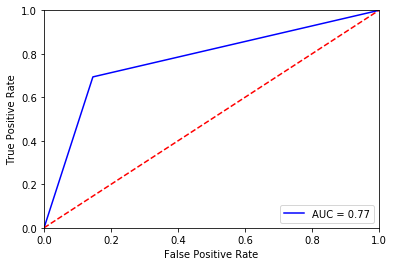

In [158]:
import matplotlib.pyplot as plt
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
df2.head()

q1  q10_1  q10_10  q10_11  q10_12  q10_2  q10_3  q10_4  q10_5  q10_6  ...  \
0   2      4       4       4       4      4      4      4      4      9  ...   
1   1      4       4       4       4      4      4      9      4      9  ...   
2   2      4       9       2       2      4      3      3      4      4  ...   
3   2      4       4       4       4      4      4      4      4      4  ...   
4   2      4       9       4       3      4      4      4      4      4  ...   

   q6_6_9  q6_7  q6_8  q6_9       q7     q7_2  q8  q9  type1  NEW  
0       0     4     4     4   100000   100000   2   2      1    0  
1       0     4     4     4   100000   100000   2   2      1    0  
2       0     4     4     4   600000   600000   2   2      1    0  
3       0     4     4     3   300000   300000   2   2      1    0  
4       0     4     4     4  1370000  1370000   2   2      1    0  

[5 rows x 73 columns]

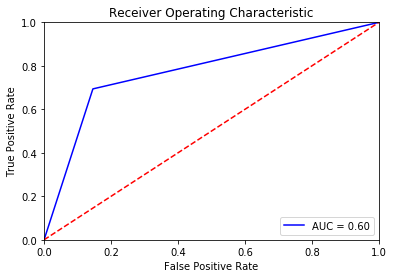

In [153]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [220]:
import statsmodels.api as sm
logit = sm.Logit(train_labels,train_features) #로지스틱 회귀분석 시행
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.462282
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.001    
Dependent Variable: y                AIC:              9236.9124
Date:               2019-08-12 03:58 BIC:              9438.6053
No. Observations:   9930             Log-Likelihood:   -4590.5  
Df Model:           27               LL-Null:          -4595.9  
Df Residuals:       9902             LLR p-value:      0.99757  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
-----------------------------------------------------------------
q10_1       1.6473    0.2059    7.9990  0.0000    1.2437   2.0509
q7         -7.4462    1.9342   -3.8497  0.0001  -11.2372  -3.6552
q7_2       -0.8283    2.5277   -0.3277  0.7431   -5.7825   4.1259
q5_1       -1.6824    0.4535   -3.7100  0.0002   -2.5712  -0.7936
q6_1       -3.9650    0.2124  -18.6642  0.0000   -4.3814  -3.5486
q10_3       1.7154    0.2792    6.1439  0.0000    1.1682   2.2627
q10_12     -1.7619    0.3156   -5.5829  0.0000   -2.3804  -1.1434
q10_2       0.0631    0.0854    0.7386  0.4601   -0.1043   0.2305
q10_5       0.3133    0.2900    1.0803  0.2800   -0.2551   0.8817
q10_6       0.1628    0.0802    2.0309  0.0423    0.0057   0.3199
q10_7       1.3836    0.3523    3.9269  0.0001    0.6930   2.0742
q10_8       1.7515    0.3534    4.9558  0.0000    1.0588   2.4442
q10_9      -0.5229    0.3373   -1.5502  0.1211   -1.1841   0.1382
q4_a       -0.6132    0.1402   -4.3748  0.0000   -0.8880  -0.3385
q6_3_a     -0.2980    0.1399   -2.1303  0.0332   -0.5722  -0.0238
q10_10      0.3192    0.0762    4.1918  0.0000    0.1700   0.4685
q10_11      0.0875    0.2821    0.3100  0.7565   -0.4655   0.6404
q6_4       -0.0777    0.1358   -0.5722  0.5672   -0.3440   0.1885
q10_4       0.8851    0.0972    9.1011  0.0000    0.6945   1.0757
q2_1_1     -0.4180    0.0845   -4.9479  0.0000   -0.5836  -0.2524
q2_1_2     -0.5483    0.0819   -6.6956  0.0000   -0.7088  -0.3878
q2_1_5     -0.0672    0.0982   -0.6840  0.4939   -0.2597   0.1253
q3         -1.9342    0.5853   -3.3047  0.0010   -3.0813  -0.7870
q4_1_a     -0.2609    0.2617   -0.9967  0.3189   -0.7738   0.2521
q6_2       -7.1238    2.7082   -2.6305  0.0085  -12.4318  -1.8158
q6_5_2     -0.6272    0.1376   -4.5574  0.0000   -0.8970  -0.3575
q6_5_6     -0.0446    0.0982   -0.4538  0.6499   -0.2371   0.1479
q6_6_1     -0.5435    0.0836   -6.5033  0.0000   -0.7073  -0.3797
================================================================

"""

In [216]:
df5.columns

Index(['q10_1', 'q7', 'q7_2', 'q5_1', 'q6_1', 'q10_3', 'q10_12', 'q10_2',
       'q10_5', 'q10_6', 'q10_7', 'q10_8', 'q10_9', 'q4_a', 'q6_3_a', 'q10_10',
       'q10_11', 'q6_4', 'q10_4', 'q2_1_1', 'q2_1_2', 'q2_1_5', 'q3', 'q4_1_a',
       'q6_2', 'q6_5_2', 'q6_5_6', 'NEW', 'q6_6_1'],
      dtype='object')

In [160]:
from sklearn import tree

In [221]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_labels)
clf.predict(test_features)

array([0., 0., 0., ..., 0., 0., 0.])

In [163]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtree.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [164]:
from sklearn.metrics import accuracy_score

y_predtree = dtree.predict(test_features)
print('Accuracy: %.2f' % accuracy_score(test_labels, y_predtree))

Accuracy: 0.84


In [222]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.59649 to fit



In [181]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [187]:
from pylab import figure, axes, pie, title, savefig
import matplotlib.pyplot as plt


In [197]:
from PIL import Image

In [212]:
graph.write_png("dtree.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.587854 to fit



True